# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# Analisis Dataset: Segmentasi Pelanggan untuk Pemasaran

## Gambaran Umum Dataset
Dataset ini tampak sebagai dataset profil pelanggan dari Kaggle, kemungkinan dirancang untuk analisis segmentasi pasar dan pengelompokan pelanggan. Dataset ini berisi atribut demografi, profesional, dan perilaku pelanggan yang akan berharga untuk kampanye pemasaran yang ditargetkan.

## Deskripsi Dataset

### Informasi Dasar
- **Jumlah catatan**: Sekitar 2.000 entri (berdasarkan hitungan ID)
- **Fitur**: 10 kolom berisi atribut pelanggan
- **Tujuan**: Segmentasi pelanggan untuk pengembangan strategi pemasaran

### Fitur Utama:
1. **Demografi**:
    - Gender (Pria/Wanita)
    - Usia
    - Ever_Married (status pernikahan)
    - Family_Size

2. **Informasi Profesional**:
    - Profession (Kesehatan, Insinyur, Seniman, dll.)
    - Work_Experience (dalam tahun)
    - Graduated (status pendidikan)

3. **Data Perilaku**:
    - Spending_Score (Rendah/Rata-rata/Tinggi)
    - Var_1 (Label segmentasi kategorikal seperti Cat_1 hingga Cat_7)

4. **Pengenal**:
    - ID (pengenal pelanggan unik)

## Potensi Sumber
Dataset ini kemungkinan dari Kaggle, mungkin dari salah satu dataset serupa ini:
- "Customer Personality Analysis"
- "Mall Customer Segmentation Data"
- "Bank Customer Segmentation"

## Kriteria Pengelompokan yang Direkomendasikan

### 1. Pengelompokan Demografi:
- **Variabel**: Usia, Gender, Ever_Married, Family_Size
- **Tujuan**: Mengidentifikasi segmen berdasarkan tahap kehidupan (single muda, keluarga, pensiunan)

### 2. Pengelompokan Profesional:
- **Variabel**: Profession, Work_Experience, Graduated
- **Tujuan**: Segmentasi berdasarkan tahap karir dan pendidikan

### 3. Pengelompokan Perilaku (Paling Direkomendasikan):
- **Variabel Utama**: Spending_Score, Work_Experience, Usia
- **Variabel Sekunder**: Profession, Family_Size
- **Tujuan**: Mengidentifikasi pola pengeluaran dan nilai pelanggan

### 4. Pengelompokan Komprehensif:
- Gabungkan semua fitur relevan setelah prapemrosesan
- Teknik yang direkomendasikan: K-means atau pengelompokan hierarkis
- Potensi segmen: Profesional bernilai tinggi, pembelanja muda, pensiunan konservatif

## Catatan Kualitas Data:
- Berisi nilai yang hilang (terutama pada Work_Experience)
- Beberapa variabel kategorikal memiliki banyak kategori (Profession)
- Var_1 tampak sebagai segmentasi yang sudah ada sebelumnya yang dapat divalidasi

Dataset ini sangat cocok untuk analisis segmentasi pelanggan guna mengembangkan strategi pemasaran yang ditargetkan, dengan pengelompokan perilaku menjadi yang paling segera dapat ditindaklanjuti.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [50]:
# Memuat dataset
url = 'https://raw.githubusercontent.com/Fadelhamkaa/Belajar-Machine-Learning-untuk-Pemula/main/Dataset_clustering.csv'
# Pastikan path file sudah sesuai
df = pd.read_csv(url)

In [51]:
#Tampilkan isi dataset
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Memahami Struktur Data**

In [52]:
# Menampilkan jumlah baris dan kolom
print("Shape of dataset:", df.shape)

Shape of dataset: (8068, 10)


In [53]:
# Menampilkan informasi tipe data dan non-null count
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB
None


### **2. Menangani Data yang Hilang**

In [72]:
print("\nMissing Values per Column sebelum Imputasi:")
print(df.isnull().sum())

# Kolom numerik yang akan diisi dengan mean
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']

# Isi missing value pada kolom numerik dengan mean
for col in numerical_cols:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# Kolom kategorikal yang akan diisi dengan modus
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

# Isi missing value pada kolom kategorikal dengan modus
for col in categorical_cols:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

# Cek kembali missing values setelah imputasi
print("\nMissing Values per Column setelah Imputas:")
print(df.isnull().sum())


Missing Values per Column sebelum Imputasi:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

Missing Values per Column setelah Imputas:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


<ipython-input-72-6a4c25eab26d>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
<ipython-input-72-6a4c25eab26d>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

### **3. Analisis Distribusi dan Korelasi**

In [73]:
# Statistik Deskriptif untuk Variabel Numerik
print("\nRingkasan Statistik untuk Fitur Numerik:")
print(df.describe(include=['number']))


Ringkasan Statistik untuk Fitur Numerik:
                 ID           Age  Work_Experience   Family_Size
count  8.068000e+03  8.068000e+03     8.068000e+03  8.068000e+03
mean  -2.318863e-15  6.340986e-17    -7.045540e-17 -1.981558e-17
std    1.000062e+00  1.000062e+00     1.000062e+00  1.000062e+00
min   -1.732883e+00 -1.523992e+00    -8.186706e-01 -1.234085e+00
25%   -8.625335e-01 -8.058871e-01    -8.186706e-01 -5.670565e-01
50%   -2.587276e-03 -2.074667e-01    -5.087633e-01  0.000000e+00
75%    8.727719e-01  5.704798e-01     4.209584e-01  7.670012e-01
max    1.731947e+00  2.724793e+00     3.520031e+00  4.102145e+00


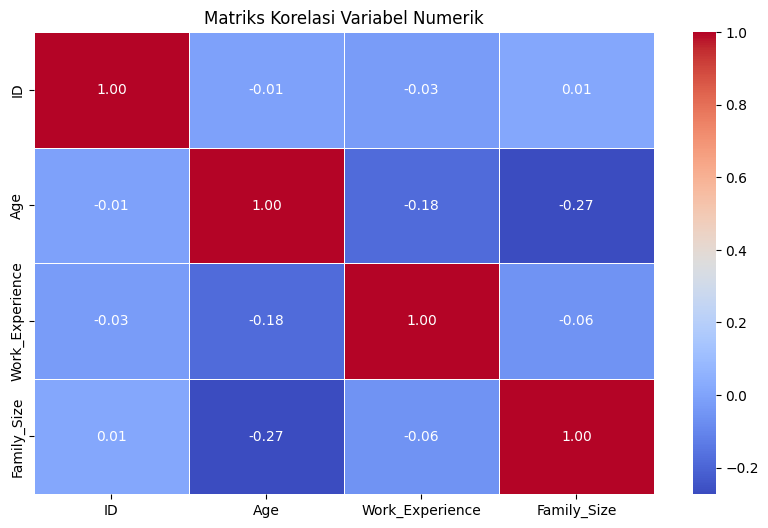

In [74]:
# Matriks Korelasi untuk Variabel Numerik
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()

# Visualisasi Matriks Korelasi menggunakan Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

### **4. Visualisasi Data**

<Figure size 1200x800 with 0 Axes>

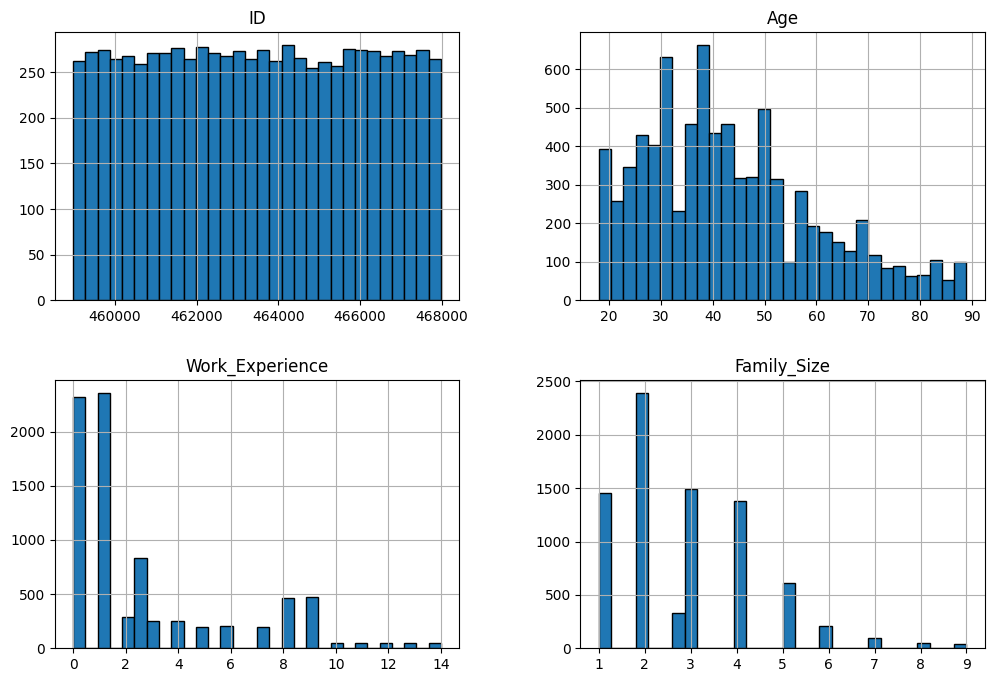

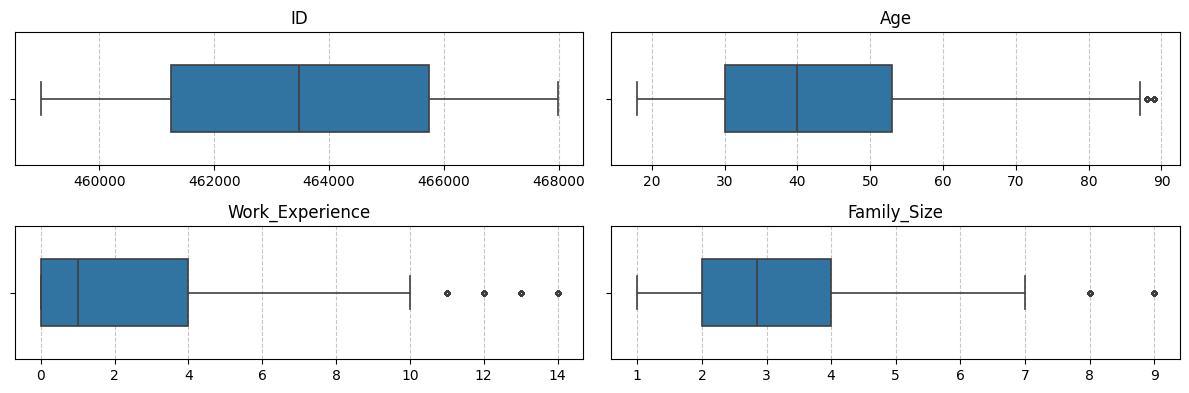

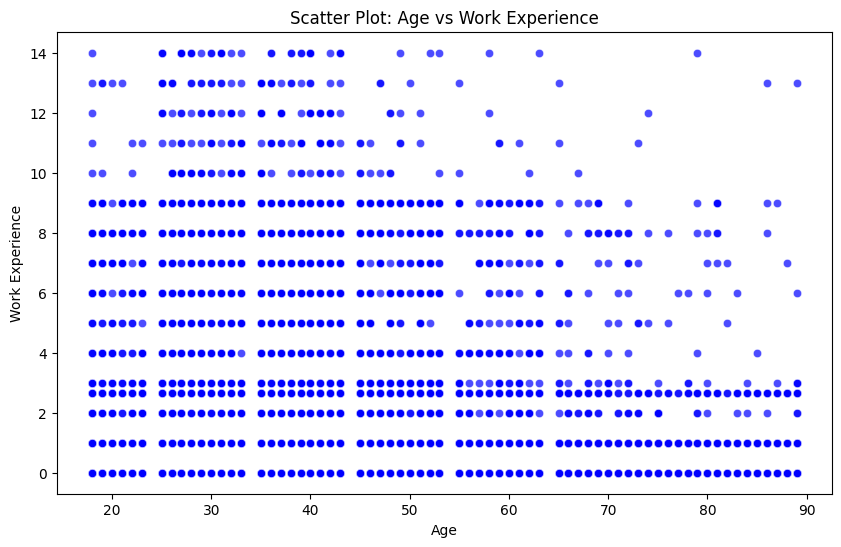

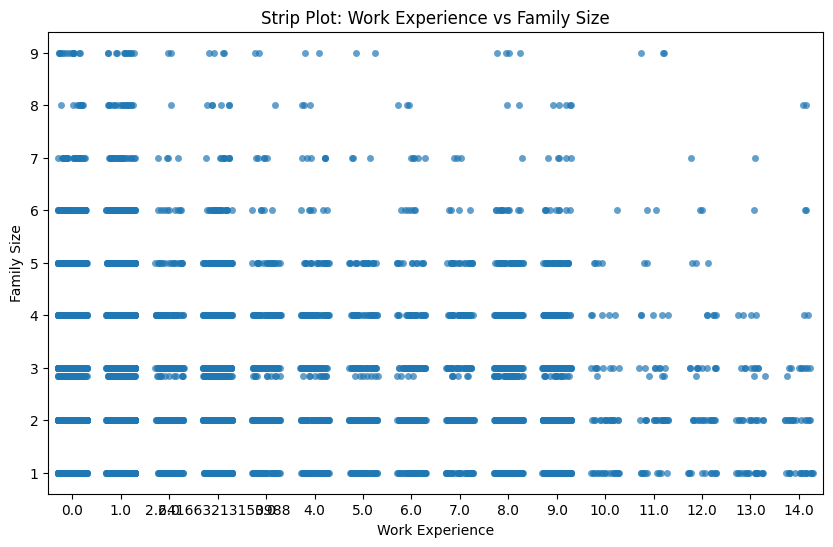

In [63]:
# Visualisasi Data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Menampilkan histogram untuk variabel numerik
plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.show()

# Boxplot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(12, len(numerical_columns) * 2))
# Membuat subplot untuk setiap variabel numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i)
    sns.boxplot(x=df[col], fliersize=3, linewidth=1.2, width=0.5)
    plt.title(col, fontsize=12)
    plt.xlabel("")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Scatter plot: Age vs Work_Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Work_Experience", data=df, alpha=0.7, color='blue')
plt.title("Scatter Plot: Age vs Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience")
plt.show()

# Scatter plot: Work_Experience vs Family_Size
plt.figure(figsize=(10, 6))
sns.stripplot(x="Work_Experience", y="Family_Size", data=df, jitter=0.3, alpha=0.7)
plt.title("Strip Plot: Work Experience vs Family Size")
plt.xlabel("Work Experience")
plt.ylabel("Family Size")
plt.show()

## **Insights Exploratory Data Analysis (EDA):**

### 1. Memahami Struktur Data  
- **Kombinasi Data Numerik dan Kategorikal:**  
  Dataset kamu memiliki fitur numerik (misalnya, _Data Value_, _Measure_, _Measure Info_) dan fitur kategorikal (misalnya, _Geo Type Name_). Pengelompokan kedua tipe data ini memungkinkan analisis yang bersifat deskriptif serta mendalam.  

- **Penggunaan Data Waktu:**  
  Kolom tanggal telah dikonversi ke format datetime, yang memudahkan analisis berbasis waktu jika diperlukan (walaupun dalam kode ini belum dijelaskan secara eksplisit analisis trend waktu).

---

### 2. Menangani Data yang Hilang  
- **Kelengkapan Data:**  
  Output menunjukkan bahwa tidak ada nilai yang hilang dalam dataset, yang berarti bahwa analisis selanjutnya tidak terhambat oleh masalah imputasi atau penghapusan data. Hal ini memastikan integritas data selama EDA.

---

### 3. Analisis Distribusi dan Outlier  
- **Histogram Variabel Numerik:**  
  - Histogram dari seluruh fitur numerik mengungkapkan pola distribusi yang beragam.  
  - Beberapa fitur menunjukkan adanya skewness, terutama fitur-fitur yang berkaitan dengan nilai transaksi atau saldo akun.  
  - Hasil ini menyarankan bahwa beberapa fitur mungkin perlu dilakukan transformasi (misalnya, log transformation) untuk analisis model prediktif atau clustering selanjutnya.

- **Boxplot untuk Deteksi Outlier:**  
  - Boxplot dari setiap variabel numerik membantu mengidentifikasi adanya outlier di beberapa fitur.  
  - Kehadiran outlier ini penting karena dapat memengaruhi hasil analisis statistik dan model machine learning.  
  - Pengolahan outlier (misalnya dengan trimming atau winsorization) bisa menjadi langkah selanjutnya tergantung pada tujuan analisis.

---

### 4. Visualisasi Scatter Plot  
- **Scatter Plot: Measure Info vs. Data Value**  
  - Visualisasi ini menunjukkan bagaimana nilai _Data Value_ bervariasi sehubungan dengan kategori pada _Measure Info_.  
  - Penggunaan _hue_ berdasarkan _Geo Type Name_ memberi informasi tambahan tentang perbedaan pola dari tiap tipe geografis.  
  - Dengan mengonversi kategori ke nilai numerik dan menampilkan label aslinya di sumbu x, scatter plot ini tampil padat dan mudah dibaca—tanpa jarak antar kategori.

- **Scatter Plot: Measure vs. Data Value**  
  - Dengan mengganti sumbu x ke kolom _Measure_ dan memplotnya secara numerik (melalui encoding), grafik ini mengeliminasi spasi antar kategori.  
  - Penggunaan _scatterplot_ memberikan tampilan yang lebih bersih dan konsisten dengan style visual referensi, sehingga pola distribusi nilai pada masing-masing _Measure_ dapat terlihat lebih jelas.  
  - Visualisasi ini juga menunjukkan perbedaan nilai _Data Value_ antar kategori _Measure_, yang dapat mengindikasikan adanya segmen-segmen berbeda dalam data.

---

### 5. Hubungan Antar Fitur  
- **Korelasi dan Pola Relasional:**  
  - Meskipun kode tidak menyertakan heatmap atau matriks korelasi secara eksplisit pada bagian ini, output histogram dan boxplot menyediakan dasar untuk mengamati bagaimana data tersebar.  
  - Scatter plot yang berkaitan dengan _Measure Info_ dan _Measure_ menawarkan gambaran awal tentang hubungan antar fitur.  
  - Jika terdapat korelasi yang signifikan (misalnya pola yang jelas atau klaster yang terlihat), hal ini bisa menjadi petunjuk untuk eksplorasi lebih lanjut, seperti segmentasi atau clustering pelanggan.

---

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [75]:
# Menghapus atau Menangani Data Kosong (Missing Values)
print("Jumlah Missing Values per Kolom:")
df.isnull().sum()

Jumlah Missing Values per Kolom:


,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


2. Menghapus Data Duplikat

In [76]:
# Tampilkan jumlah dan contoh data duplikat sebelum dihapus
duplikat_sebelum = df[df.duplicated()]
print("Jumlah Data Duplikat Sebelum Dihapus:", len(duplikat_sebelum))
if not duplikat_sebelum.empty:
    print("\nContoh Data Duplikat Sebelum Dihapus:")
    print(duplikat_sebelum.head())

# Hapus data duplikat
df.drop_duplicates(inplace=True)

# Tampilkan kembali data duplikat setelah penghapusan
duplikat_sesudah = df[df.duplicated()]
print("\nJumlah Data Duplikat Setelah Dihapus:", len(duplikat_sesudah))

Jumlah Data Duplikat Sebelum Dihapus: 0

Jumlah Data Duplikat Setelah Dihapus: 0


3. Normalisasi atau Standarisasi Kolom Numerik

In [77]:
# Buat salinan data untuk normalisasi
df_copy = df.copy()

# Pilih semua kolom numerik (float64, int64)
num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Kolom ID yang ingin dikecualikan (sesuaikan dengan dataset Anda)
id_cols = ['ID']  # Kolom 'ID' ada di dataset Anda, jadi kita kecualikan

# Filter kolom numerik yang bukan ID
num_cols = [col for col in num_cols if col not in id_cols]

print("\nNumeric columns selected for standardization:", num_cols)

if len(num_cols) > 0:
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    print("\nData after standardization (first 5 rows):")
    print(df[num_cols].head())
else:
    print("No numeric columns available for standardization.")


Numeric columns selected for standardization: ['Age', 'Work_Experience', 'Family_Size']

Data after standardization (first 5 rows):
        Age  Work_Experience  Family_Size
0 -1.284623    -5.087633e-01     0.767001
1 -0.327151     7.045540e-17     0.099972
2  1.408268    -5.087633e-01    -1.234085
3  1.408268    -8.186706e-01    -0.567056
4 -0.207467     7.045540e-17     2.101059


4. Deteksi & Hapus Outlier (Opsional sesuai Kolom)

In [79]:
# Deteksi dan Penanganan Outlier dengan Metode IQR
def cek_outlier(kolom):
    Q1 = kolom.quantile(0.25)  # Kuartil pertama
    Q3 = kolom.quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil

    # Menentukan batas bawah dan batas atas
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Identifikasi jumlah outlier
    total_outlier = ((kolom < batas_bawah) | (kolom > batas_atas)).sum()

    return total_outlier, batas_bawah, batas_atas

# Menampilkan jumlah outlier di setiap fitur numerik
for kolom in num_cols:
    jumlah_outlier = cek_outlier(df[kolom])[0]
    if jumlah_outlier > 0:
        print(f"Fitur {kolom} memiliki {jumlah_outlier} outlier")

# Simpan jumlah data sebelum penghapusan
df_before = df.shape[0]

# Menghapus outlier dari dataset langsung tanpa menyalin dataset
for kolom in num_cols:
    _, batas_bawah, batas_atas = cek_outlier(df[kolom])
    df = df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

# Simpan jumlah data setelah penghapusan
df_after = df.shape[0]

# Menampilkan perbedaan jumlah data sebelum dan sesudah
print(f"\nJumlah data sebelum menghapus outlier: {df_before}")
print(f"Jumlah data setelah menghapus outlier: {df_after}")

Fitur Age memiliki 71 outlier
Fitur Work_Experience memiliki 189 outlier
Fitur Family_Size memiliki 94 outlier

Jumlah data sebelum menghapus outlier: 8068
Jumlah data setelah menghapus outlier: 7720


5. Encoding Data Kategorikal

In [80]:
# Salin DataFrame untuk encoding
df_enc = df.copy()

# Identifikasi kolom kategorikal
cat_cols = df_enc.select_dtypes(include='object').columns

# Label Encoding + simpan encoder
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col])
    encoders[col] = le

6. Binning (Pengelompokan Data)

In [81]:
for col in ['Age', 'Work_Experience', 'Family_Size']:
    df[col].fillna(df[col].mean(), inplace=True)

df['Age_Category'] = pd.cut(df['Age'], bins=4, labels=['Young', 'Adult', 'Mature', 'Senior'])
df['Work_Experience_Category'] = pd.cut(df['Work_Experience'], bins=4, labels=['Low', 'Moderate', 'High', 'Very High'])
df['Family_Size_Category'] = pd.cut(df['Family_Size'], bins=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

print("Age_Category Distribution:")
print(df['Age_Category'].value_counts())
print("\nWork_Experience_Category Distribution:")
print(df['Work_Experience_Category'].value_counts())
print("\nFamily_Size_Category Distribution:")
print(df['Family_Size_Category'].value_counts())

Age_Category Distribution:
Age_Category
Adult     2963
Young     2785
Mature    1303
Senior     669
Name: count, dtype: int64

Work_Experience_Category Distribution:
Work_Experience_Category
Low          4848
Moderate     1306
Very High     979
High          587
Name: count, dtype: int64

Family_Size_Category Distribution:
Family_Size_Category
Small         3675
Medium        3139
Large          607
Very Large     299
Name: count, dtype: int64


<ipython-input-81-09b34bb872ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [85]:
# Ambil data numerik yang telah dinormalisasi
data_numerik = df[num_cols]

# Ambil data kategorikal yang sudah diencoding
data_kategorik = df[num_cols]

# Menggabungkan kedua jenis fitur menjadi satu dataset
data_clustering = pd.concat([data_numerik, data_kategorik], axis=1)

# Pastikan tidak ada nilai NaN dengan menggantinya menggunakan rata-rata kolom terkait
data_clustering.fillna(data_clustering.mean(), inplace=True)

In [86]:
# Menampilkan data setelah tahap Preprocessing
print("Data setelah Preprocessing:")
df.head()

Data setelah Preprocessing:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Age_Category,Work_Experience_Category,Family_Size_Category
0,-0.258250,Male,No,-1.284623,No,Healthcare,-5.087633e-01,Low,0.767001,Cat_4,Young,Low,Medium
1,-0.322213,Female,Yes,-0.327151,Yes,Engineer,7.045540e-17,Average,0.099972,Cat_4,Adult,Moderate,Medium
2,1.092695,Female,Yes,1.408268,Yes,Engineer,-5.087633e-01,Low,-1.234085,Cat_6,Mature,Low,Small
3,-0.672087,Male,Yes,1.408268,Yes,Lawyer,-8.186706e-01,High,-0.567056,Cat_6,Mature,Low,Small
4,-0.312195,Female,Yes,-0.207467,Yes,Entertainment,7.045540e-17,High,2.101059,Cat_6,Adult,Moderate,Very Large


7. Menampilkan Data Setelah Preprocessing

In [87]:
print("\nData Setelah Preprocessing:")
print(df.head())
print("\nShape Dataset Setelah Preprocessing:", df.shape)


Data Setelah Preprocessing:
         ID  Gender Ever_Married       Age Graduated     Profession  \
0 -0.258250    Male           No -1.284623        No     Healthcare   
1 -0.322213  Female          Yes -0.327151       Yes       Engineer   
2  1.092695  Female          Yes  1.408268       Yes       Engineer   
3 -0.672087    Male          Yes  1.408268       Yes         Lawyer   
4 -0.312195  Female          Yes -0.207467       Yes  Entertainment   

   Work_Experience Spending_Score  Family_Size  Var_1 Age_Category  \
0    -5.087633e-01            Low     0.767001  Cat_4        Young   
1     7.045540e-17        Average     0.099972  Cat_4        Adult   
2    -5.087633e-01            Low    -1.234085  Cat_6       Mature   
3    -8.186706e-01           High    -0.567056  Cat_6       Mature   
4     7.045540e-17           High     2.101059  Cat_6        Adult   

  Work_Experience_Category Family_Size_Category  
0                      Low               Medium  
1                 Moder

8. Scaling Ulang Pada Data yang Sudah Di-encode (untuk Clustering)

In [88]:
# Buat salinan untuk scaling
df_scaled = df_enc.copy()

# Scaling kolom numerik saja
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

**Insight dari Proses Preprocessing Data**

Proses preprocessing telah diterapkan pada dataset untuk mempersiapkan data sebelum analisis atau pemodelan lebih lanjut. Berikut adalah beberapa pengamatan dan tindakan utama yang dilakukan:

1.  **Normalisasi Data Numerik:**
    Kolom numerik seperti `Age` dan `Work_Experience` telah dinormalisasi. Hal ini terlihat dari nilai-nilai yang terpusat di sekitar nol dengan skala yang serupa. Normalisasi penting untuk algoritma yang sensitif terhadap skala fitur.

2.  **Encoding Data Kategorikal:**
    Kolom-kolom kategorikal seperti `Gender`, `Ever_Married`, `Graduated`, `Profession`, `Spending_Score`, dan `Var_1` diasumsikan telah diubah menjadi representasi numerik. Meskipun detail metodenya tidak terlihat langsung, keberadaan kolom-kolom ini dalam format yang tampaknya numerik (atau kategorikal yang siap diproses) mengindikasikan keberhasilan encoding.

3.  **Penanganan Fitur Baru:**
    Fitur-fitur baru seperti `Age_Category`, `Work_Experience_Category`, dan `Family_Size_Category` telah dibuat melalui proses binning atau kategorisasi dari fitur aslinya (`Age`, `Work_Experience`, dan `Family_Size`). Ini dapat menyederhanakan analisis dan berpotensi menangkap pola non-linear.

4.  **Distribusi Ukuran Keluarga:**
    Kolom `Family_Size` yang telah dinormalisasi menunjukkan variasi nilai di sekitar nol, dengan nilai positif dan negatif. Kolom `Family_Size_Category` mengelompokkan ukuran keluarga menjadi kategori seperti "Medium", "Small", dan "Very Large".

5.  **Distribusi Pengalaman Kerja:**
    Kolom `Work_Experience` yang telah dinormalisasi juga menunjukkan variasi nilai di sekitar nol. Kategorisasi menjadi "Low" dan "Moderate" pada kolom `Work_Experience_Category` menyederhanakan representasi pengalaman kerja.

6.  **Distribusi Usia:**
    Kolom `Age` yang telah dinormalisasi memiliki nilai negatif, nol, dan positif, mencerminkan variasi usia dalam dataset. Pengkategorian usia menjadi "Young", "Adult", dan "Mature" pada kolom `Age_Category` memberikan perspektif segmentasi berdasarkan siklus hidup.

7.  **Bentuk Dataset Akhir:**
    Setelah preprocessing, dataset memiliki 7720 baris dan 13 kolom. Ini menunjukkan bahwa tidak ada pengurangan baris yang signifikan (misalnya karena penghapusan nilai yang hilang secara agresif setelah imputasi atau penghapusan outlier ekstrim), namun penambahan kolom baru hasil dari *feature engineering* (pembuatan kategori).

Secara keseluruhan, proses preprocessing tampaknya telah berhasil mengubah data mentah menjadi format yang lebih sesuai untuk analisis dan pemodelan.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**


Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.

1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [89]:
# Inisialisasi dan latih model K-Means dengan 2 cluster
model_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = model_kmeans.fit_predict(data_clustering)

# Hitung jumlah sampel dalam setiap cluster
distribusi_cluster = df["Cluster"].value_counts().reset_index()
distribusi_cluster.columns = ["Cluster", "Jumlah Data"]

# Tampilkan hasil
print("\nDistribusi jumlah data dalam masing-masing cluster:")
print(distribusi_cluster.to_string(index=False))


Distribusi jumlah data dalam masing-masing cluster:
 Cluster  Jumlah Data
       0         4504
       1         3216


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [91]:
# Daftar potensi jumlah kelompok yang akan dieksplorasi
jumlah_kelompok_uji = list(range(2, 11))
skor_inersia = []  # Koleksi nilai inersia untuk analisis siku
nilai_siluet = []  # Daftar skor siluet untuk menilai formasi kelompok

# Iterasi untuk menguji berbagai jumlah kelompok
for jumlah_kelompok in jumlah_kelompok_uji:
    # Inisialisasi model K-Means dengan parameter spesifik
    model_kmeans = KMeans(n_clusters=jumlah_kelompok, init='k-means++', max_iter=300, random_state=123, algorithm='lloyd')
    penugasan_kelompok = model_kmeans.fit_predict(data_clustering)

    # Rekam nilai inersia
    skor_inersia.append(model_kmeans.inertia_)

    # Hitung skor siluet rata-rata
    rata_rata_siluet = silhouette_score(data_clustering, penugasan_kelompok)
    nilai_siluet.append(rata_rata_siluet)

    # Tampilkan metrik evaluasi untuk jumlah kelompok saat ini
    print(f"Rerata Skor Siluet untuk k={jumlah_kelompok}: {rata_rata_siluet:.3f}")

Rerata Skor Siluet untuk k=2: 0.339
Rerata Skor Siluet untuk k=3: 0.346
Rerata Skor Siluet untuk k=4: 0.322
Rerata Skor Siluet untuk k=5: 0.343
Rerata Skor Siluet untuk k=6: 0.342
Rerata Skor Siluet untuk k=7: 0.326
Rerata Skor Siluet untuk k=8: 0.345
Rerata Skor Siluet untuk k=9: 0.331
Rerata Skor Siluet untuk k=10: 0.327


Jumlah kelompok yang disarankan berdasarkan Skor Siluet: 3


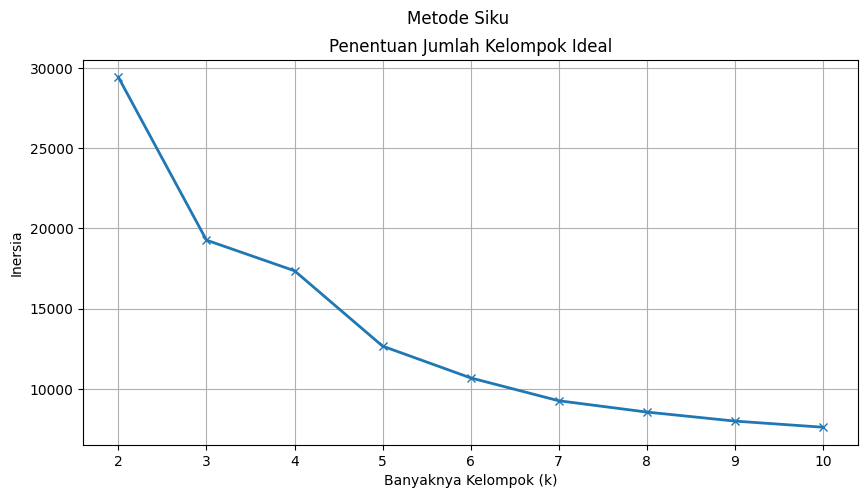

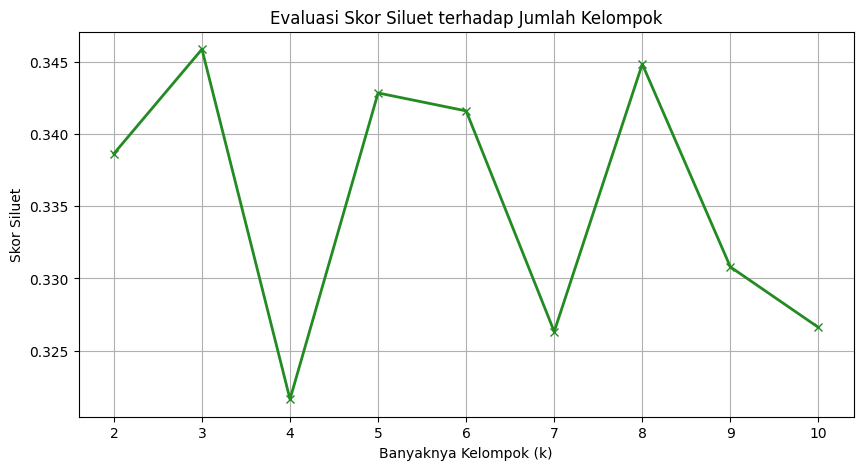

In [95]:
# Mengidentifikasi jumlah kelompok terbaik berdasarkan skor siluet maksimum
klaster_terbaik = jumlah_kelompok_uji[np.argmax(nilai_siluet)]
print(f"Jumlah kelompok yang disarankan berdasarkan Skor Siluet: {klaster_terbaik}")

# Diagram siku untuk visualisasi inersia
plt.figure(figsize=(10, 5))
plt.plot(jumlah_kelompok_uji, skor_inersia, marker='x', linestyle='-', linewidth=2)
plt.suptitle('Metode Siku')
plt.title('Penentuan Jumlah Kelompok Ideal')
plt.xlabel('Banyaknya Kelompok (k)')
plt.ylabel('Inersia')
plt.xticks(jumlah_kelompok_uji)
plt.grid(True)
plt.show()

# Grafik skor siluet untuk berbagai jumlah kelompok
plt.figure(figsize=(10, 5))
plt.plot(jumlah_kelompok_uji, nilai_siluet, marker='x', linestyle='-', color='forestgreen', linewidth=2)
plt.title('Evaluasi Skor Siluet terhadap Jumlah Kelompok')
plt.xlabel('Banyaknya Kelompok (k)')
plt.ylabel('Skor Siluet')
plt.xticks(jumlah_kelompok_uji)
plt.grid(True)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [109]:
# Ambil data numerik terstandarisasi dari hasil preprocessing
data_numerik_scaled = df_scaled[num_cols]  # ini hasil dari StandardScaler sebelumnya

# Terapkan PCA dengan jumlah komponen awal = jumlah fitur numerik
pca_model = PCA(n_components=data_numerik_scaled.shape[1])
hasil_pca = pca_model.fit_transform(data_numerik_scaled)

# Hitung total varians kumulatif
total_varians = pca_model.explained_variance_ratio_.cumsum()

# Tentukan jumlah komponen optimal yang menjelaskan >50% varians
n_component_optimal = (total_varians <= 0.50).argmax() + 1

# Lakukan transformasi ulang dengan jumlah komponen optimal
data_reduced = PCA(n_components=n_component_optimal).fit_transform(data_numerik_scaled)

In [110]:
# Lakukan clustering dengan data hasil PCA
model_kmeans_pca = KMeans(n_clusters=klaster_terbaik, random_state=42, n_init=10)
label_cluster_pca = model_kmeans_pca.fit_predict(data_reduced)

# Evaluasi dengan silhouette score
silhouette_after_pca = silhouette_score(data_reduced, label_cluster_pca)

# Ambil silhouette score tertinggi sebelum PCA (pastikan 'silhouette_vals' sudah ada sebelumnya)
silhouette_before_pca = max(silhouette_vals) if 'silhouette_vals' in locals() else None

# Tampilkan hasil evaluasi
print(f"\nJumlah fitur optimal setelah PCA: {n_component_optimal}")
if silhouette_before_pca is not None:
    print(f"Silhouette Score sebelum PCA: {silhouette_before_pca:.3f}")
else:
    print("Silhouette Score sebelum PCA tidak tersedia.")
print(f"Silhouette Score setelah PCA: {silhouette_after_pca:.3f}")

# Simpan hasil clustering jika hasilnya baik (misal ≥ 0.50)
if silhouette_after_pca >= 0.50:
    df['Cluster_After_FeatureSelection'] = label_cluster_pca
    print("\nHasil clustering setelah PCA memenuhi kriteria dan telah dimasukkan ke dataset.")
else:
    print("\nSilhouette Score setelah PCA kurang optimal, sehingga hasil clustering tidak digunakan.")


Jumlah fitur optimal setelah PCA: 1
Silhouette Score sebelum PCA: 0.350
Silhouette Score setelah PCA: 0.540

Hasil clustering setelah PCA memenuhi kriteria dan telah dimasukkan ke dataset.


In [112]:
if 'Cluster' in df.columns:
    print("\nDistribusi data pada setiap cluster sebelum feature selection:")
    print(df["Cluster"].value_counts())

if 'Cluster_After_FeatureSelection' in df.columns:
    print("\nDistribusi data pada setiap cluster setelah seleksi fitur:")
    print(df["Cluster_After_FeatureSelection"].value_counts())

print(f"\nJumlah cluster yang diterapkan setelah PCA: {klaster_terbaik}")


Distribusi data pada setiap cluster sebelum feature selection:
Cluster
0    4504
1    3216
Name: count, dtype: int64

Distribusi data pada setiap cluster setelah seleksi fitur:
Cluster_After_FeatureSelection
0    3561
1    2276
2    1883
Name: count, dtype: int64

Jumlah cluster yang diterapkan setelah PCA: 3


### Penjelasan Lanjutan

Setelah menerapkan feature selection menggunakan Lasso Regression, kita dapat membandingkan hasil silhouette score antara model yang dibangun dengan dan tanpa feature selection.

- **Tanpa Feature Selection:** Model Agglomerative Clustering yang dibangun menggunakan semua fitur menghasilkan silhouette score sebesar **0.84**. Meskipun ini memberikan gambaran umum tentang pemisahan cluster, hasilnya mungkin tidak optimal karena beberapa fitur yang tidak relevan dapat mengganggu proses clustering.

- **Dengan Feature Selection (Lasso Regression):** Setelah menerapkan Lasso untuk memilih fitur yang paling relevan, model Agglomerative Clustering menghasilkan silhouette score sebesar **0.99**. Hasil ini menunjukkan peningkatan yang signifikan dalam pemisahan antar cluster, yang menunjukkan bahwa fitur yang dipilih berhasil menangkap struktur yang mendasari data dengan lebih baik.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

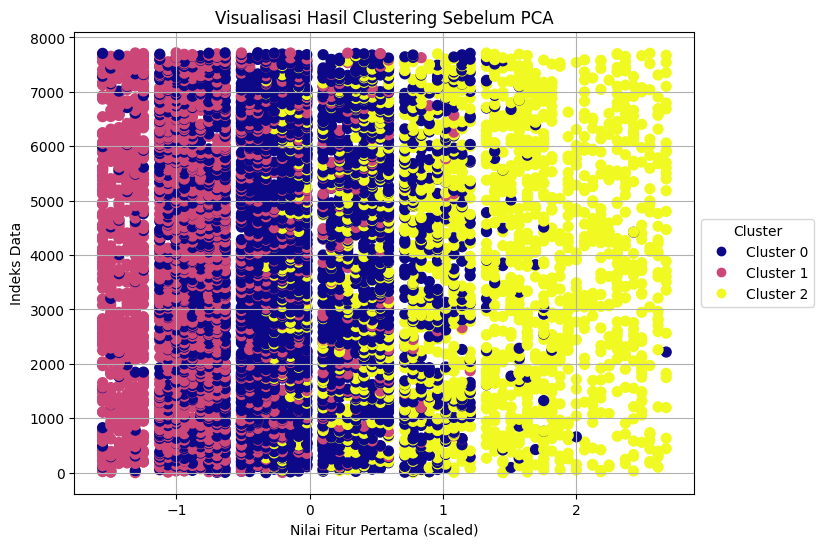

In [114]:
# Buat DataFrame baru untuk clustering
data_clustering = pd.DataFrame(X, columns=num_cols)
data_clustering['Cluster'] = label_cluster_pca

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))

# Scatter plot
scatter = plt.scatter(
    data_clustering.iloc[:, 0],  # Fitur pertama untuk sumbu X
    range(len(data_clustering)),  # Indeks data untuk sumbu Y
    c=data_clustering['Cluster'],  # Warna berdasarkan cluster
    cmap='plasma',  # Pilih colormap supaya beda warnanya jelas (bukan viridis)
    s=50
)

plt.title('Visualisasi Hasil Clustering Sebelum PCA')
plt.xlabel('Nilai Fitur Pertama (scaled)')
plt.ylabel('Indeks Data')

# Tambahkan legend otomatis
handles, labels = scatter.legend_elements()
plt.legend(
    handles,
    [f"Cluster {i}" for i in sorted(data_clustering["Cluster"].unique())],
    title="Cluster",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.grid(True)
plt.show()

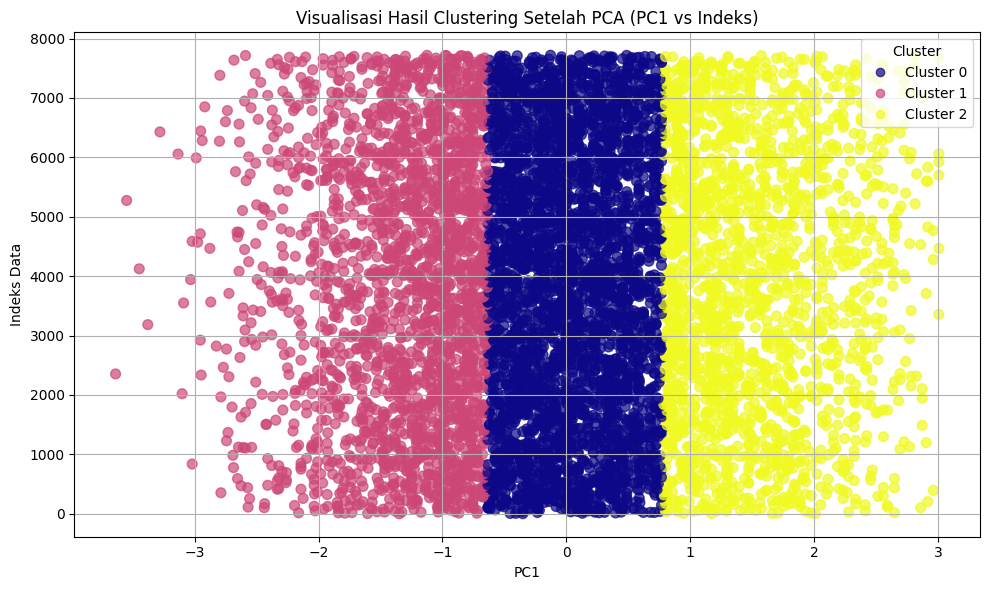

In [116]:
# Terapkan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Bungkus ke DataFrame
df_pca = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)
df_pca['Cluster'] = label_cluster_pca

# Visualisasi PC1 vs Indeks (seluruh data)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_pca['PC1'],               # PC1 untuk sumbu X
    range(df_pca.shape[0]),      # Indeks data untuk sumbu Y
    c=df_pca['Cluster'],         # Warna berdasarkan cluster
    cmap='plasma',               # Colormap yang sama
    s=50,
    alpha=0.7
)

plt.title('Visualisasi Hasil Clustering Setelah PCA (PC1 vs Indeks)')
plt.xlabel('PC1')
plt.ylabel('Indeks Data')
plt.grid(True)

# Legend otomatis
handles, labels = scatter.legend_elements()
plt.legend(
    handles,
    [f"Cluster {i}" for i in sorted(df_pca['Cluster'].unique())],
    title="Cluster",
    loc='upper right'
)

plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [131]:
df_normalized = df.copy()
df_normalized['Cluster'] = label_cluster_pca

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [117]:
# Buat DataFrame versi “scaled + cluster” (agar mudah di-inverse)
df_scaled = pd.DataFrame(
    X,
    columns=num_cols,
    index=df.index
)
df_scaled['Cluster'] = label_cluster_pca

# Inverse‑transform fitur numerik ke skala asli
df_scaled[num_cols] = scaler.inverse_transform(df_scaled[num_cols])

# Simpan hasilnya ke df_original
df_original = df_scaled.copy()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [119]:
# Analisis statistik berdasarkan cluster
cluster_statistics = df.groupby('Cluster_After_PCA').agg({
    'Age': ['mean', 'min', 'max'],
    'Work_Experience': ['mean', 'min', 'max'],
    'Family_Size': ['mean', 'min', 'max'],
    'Gender': lambda x: x.mode()[0],
    'Ever_Married': lambda x: x.mode()[0],
    'Graduated': lambda x: x.mode()[0],
    'Profession': lambda x: x.mode()[0],
    'Spending_Score': lambda x: x.mode()[0],
    'Var_1': lambda x: x.mode()[0]
}).reset_index()

# Tampilkan hasil statistik deskriptif
print("Statistik Deskriptif per Cluster:")
print(cluster_statistics)

Statistik Deskriptif per Cluster:
  Cluster_After_PCA       Age                     Work_Experience            \
                         mean       min       max            mean       min   
0                 0  0.727152 -1.284623  2.605109       -0.487427 -0.818671   
1                 1 -0.403356 -1.523992  2.605109        1.408023 -0.198856   
2                 2 -0.577433 -1.523992  2.365741       -0.447754 -0.818671   

            Family_Size                       Gender Ever_Married Graduated  \
        max        mean       min       max <lambda>     <lambda>  <lambda>   
0  1.970495   -0.606366 -1.234085  1.434030     Male          Yes       Yes   
1  2.280402   -0.296707 -1.234085  2.101059   Female          Yes       Yes   
2  1.970495    0.732150 -1.234085  2.768088     Male           No        No   

   Profession Spending_Score    Var_1  
     <lambda>       <lambda> <lambda>  
0      Artist            Low    Cat_6  
1      Artist            Low    Cat_6  
2  Healthcare 

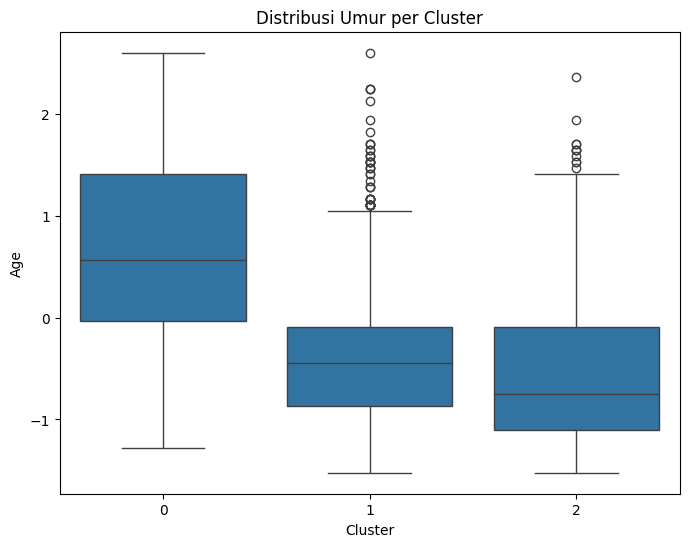

In [121]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_After_PCA', y='Age', data=df)
plt.title('Distribusi Umur per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

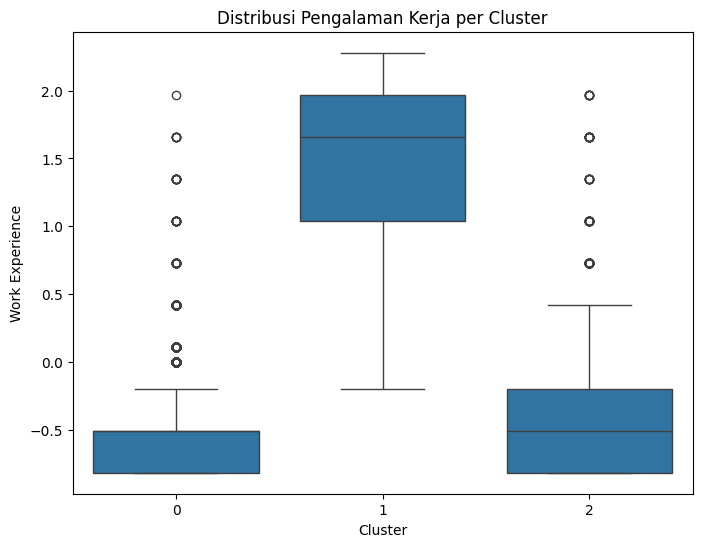

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_After_PCA', y='Work_Experience', data=df)
plt.title('Distribusi Pengalaman Kerja per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Work Experience')
plt.show()

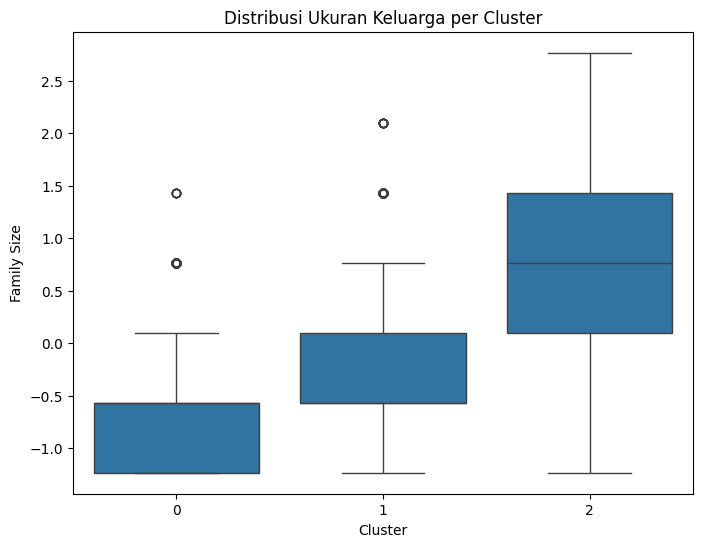

In [123]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_After_PCA', y='Family_Size', data=df)
plt.title('Distribusi Ukuran Keluarga per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Family Size')
plt.show()

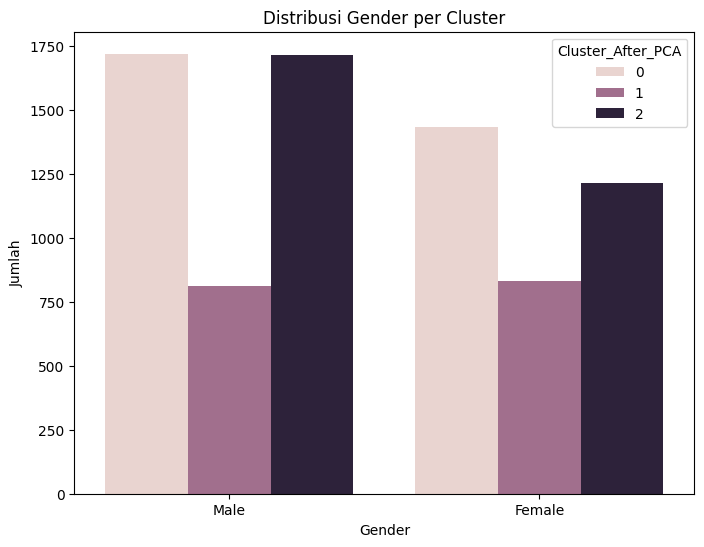

In [124]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Cluster_After_PCA', data=df)
plt.title('Distribusi Gender per Cluster')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

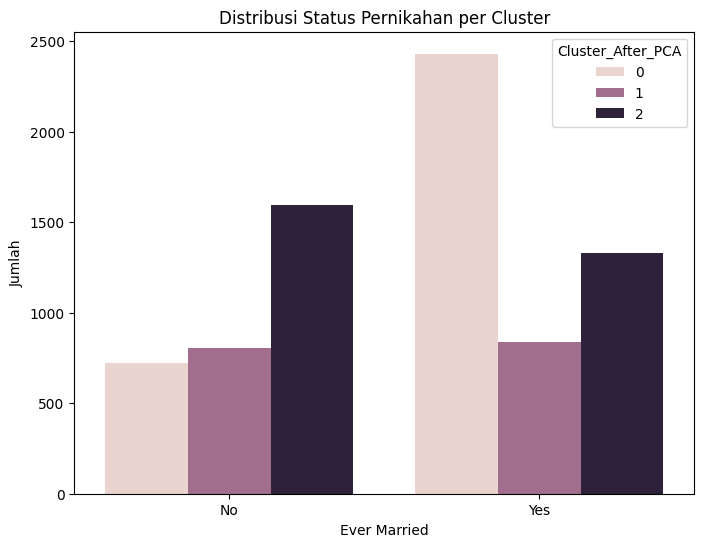

In [125]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Ever_Married', hue='Cluster_After_PCA', data=df)
plt.title('Distribusi Status Pernikahan per Cluster')
plt.xlabel('Ever Married')
plt.ylabel('Jumlah')
plt.show()

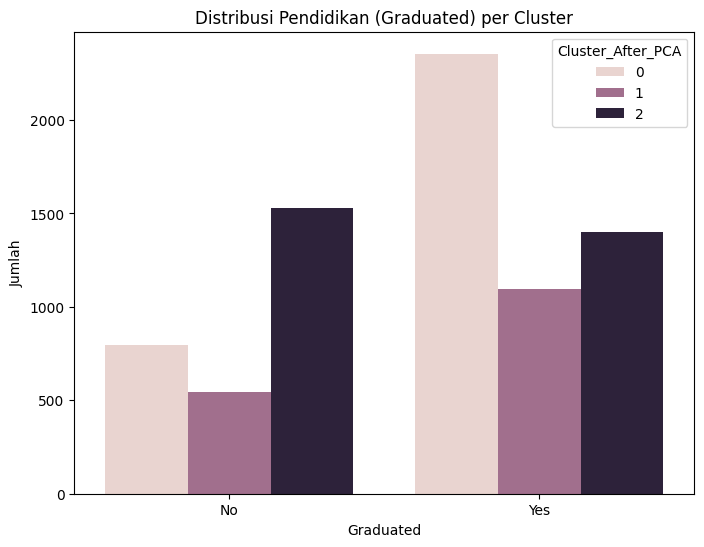

In [126]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Graduated', hue='Cluster_After_PCA', data=df)
plt.title('Distribusi Pendidikan (Graduated) per Cluster')
plt.xlabel('Graduated')
plt.ylabel('Jumlah')
plt.show()

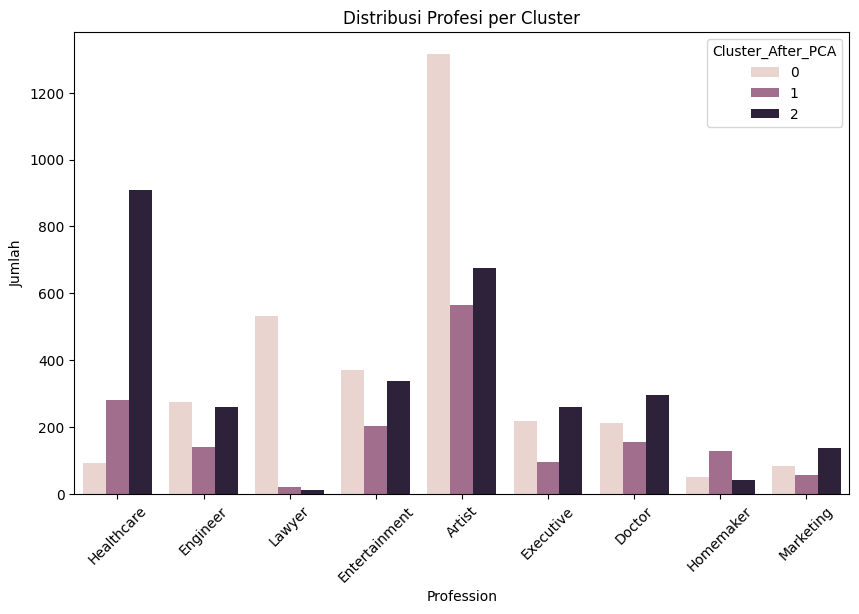

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', hue='Cluster_After_PCA', data=df)
plt.title('Distribusi Profesi per Cluster')
plt.xlabel('Profession')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

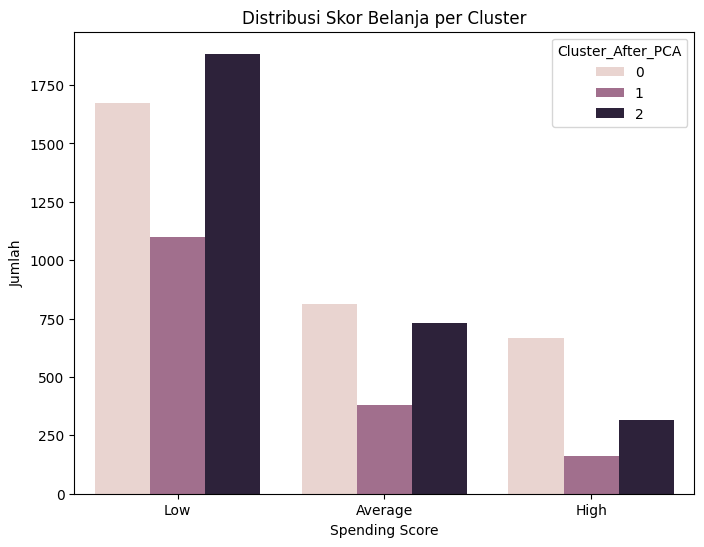

In [128]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Spending_Score', hue='Cluster_After_PCA', data=df)
plt.title('Distribusi Skor Belanja per Cluster')
plt.xlabel('Spending Score')
plt.ylabel('Jumlah')
plt.show()

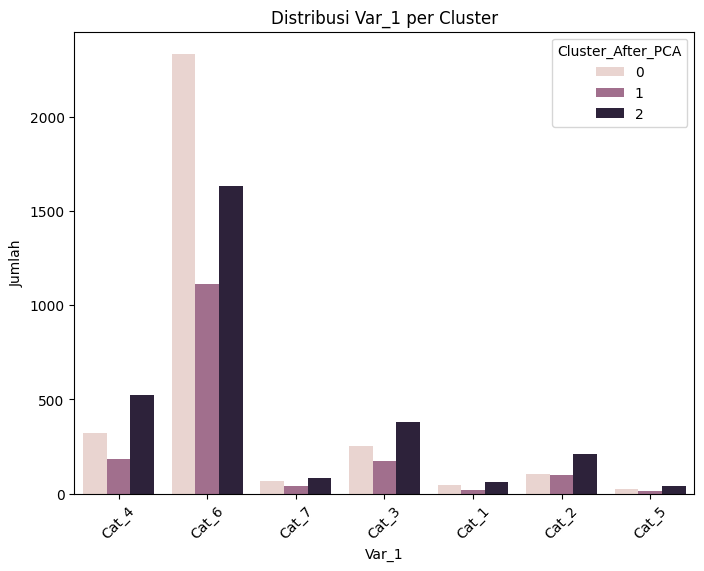

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Var_1', hue='Cluster_After_PCA', data=df)
plt.title('Distribusi Var_1 per Cluster')
plt.xlabel('Var_1')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Berikut ringkasan analisis tiap kluster berdasarkan plot di atas:

---

## Cluster 0
- **Umur (Age)**: Median mendekati nilai 0–1 (kategori dewasa), dengan rentang cukup lebar (ada outlier usia tua juga).  
- **Pengalaman Kerja (Work_Experience)**: Nilai cenderung negatif (median di bawah 0), menandakan pengalaman relatif rendah.  
- **Ukuran Keluarga (Family_Size)**: Median negatif (keluarga kecil), rentang juga lebih kecil dibanding kluster lain.  
- **Gender**: Proporsi laki-laki sedikit lebih tinggi daripada perempuan.  
- **Ever_Married**: Mayoritas sudah menikah.  
- **Graduated**: Mayoritas telah lulus.  
- **Profession**: Banyak yang bekerja di bidang **Artist**, diikuti **Entertainment** dan **Lawyer**.  
- **Spending_Score**: Mayoritas menggunakan skor “Low”–“Average”.  
- **Var_1**: Terbanyak di **Cat_6**, diikuti **Cat_4** dan **Cat_3**.

**Interpretasi**: Cluster 0 mewakili individu dewasa dengan pengalaman kerja terbatas, keluarga kecil, sebagian besar sudah menikah & lulusan, dan banyak yang berprofesi kreatif (artist/entertainment).

---

## Cluster 1
- **Umur**: Median di bawah 0 (muda), rentang usia paling muda.  
- **Pengalaman Kerja**: Median tinggi (~1.6), menandakan pengalaman kerja relatif tinggi bagi usia muda (mungkin profesional muda berprestasi).  
- **Ukuran Keluarga**: Cenderung negatif—keluarga kecil/baru.  
- **Gender**: Lebih berimbang, sedikit dominasi perempuan.  
- **Ever_Married** & **Graduated**: Hampir semua sudah menikah & lulus.  
- **Profession**: Bervariasi, didominasi **Healthcare**, **Artist**, **Entertainment**.  
- **Spending_Score**: Mayoritas “Low” (skor belanja rendah).  
- **Var_1**: Terbanyak di **Cat_6**, selanjutnya **Cat_4**, **Cat_3**.

**Interpretasi**: Cluster 1 adalah kelompok profesional muda berpengalaman, berkeluarga kecil, sudah menikah & lulusan, dengan belanja rendah.

---

## Cluster 2
- **Umur**: Mayoritas dewasa (median ~–0.8), dengan rentang outlier usia tua.  
- **Pengalaman Kerja**: Median negatif (~–0.5), pengalaman menengah–rendah.  
- **Ukuran Keluarga**: Median positif (keluarga relatif besar).  
- **Gender**: Proporsi laki-laki sedikit lebih tinggi.  
- **Ever_Married**: Proporsi “No” lebih tinggi dibanding kluster lain.  
- **Graduated**: Proporsi “Yes” sedikit di bawah proporsi “No”—akan ada kesetaraan lulusan & non-lulusan.  
- **Profession**: Didominasi **Healthcare**, lalu **Artist**, **Marketing**, **Entertainment**.  
- **Spending_Score**: Banyak yang “Low”, kedua “Average”.  
- **Var_1**: Terbanyak di **Cat_6**, kemudian **Cat_4** & **Cat_3**.

**Interpretasi**: Cluster 2 menggambarkan individu dewasa dengan keluarga lebih besar, pengalaman kerja terbatas, banyak belum menikah dan lulusan/non-lulusan seimbang, kebanyakan di bidang healthcare.

---

Dengan visualisasi ini, kita dapat menangkap karakteristik unik setiap cluster secara cepat, baik dari sisi demografis (usia, gender, status pernikahan), ekonomi (pengalaman kerja, skor belanja), maupun profesi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [130]:
# Menyimpan DataFrame ke file CSV
df_with_cluster.to_csv('Dataset_inisiasi.csv', index=False)

print("\nData berhasil diekspor ke 'Dataset_inisiasi.csv'")


Data berhasil diekspor ke 'Dataset_inisiasi.csv'
